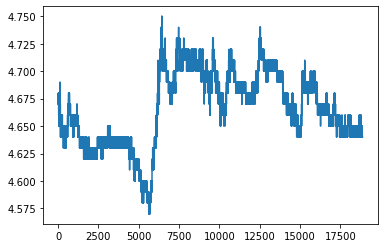

In [1]:
import pandas as pd
data = pd.read_excel("data.xlsx", sheet_name = 1)
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(data["price"]) ## 画一下价格
plt.show()
## 处理一下买卖价量，由于题目给的是字符型，用literal_eval函数转换
from ast import literal_eval
import numpy as np
bid_price_list = []
bid_volume_list = []
ask_price_list = []
ask_volume_list = []
for i in range(len(data)):
    temp = (literal_eval(data.iloc[i]["bid_price"]))
    for j in range(len(temp)):
        temp[j] = round(temp[j],2)
    bid_price_list.append(temp)
    
    temp = (literal_eval(data.iloc[i]["ask_price"]))
    for j in range(len(temp)):
        temp[j] = round(temp[j],2)
    ask_price_list.append(temp)
    
    temp = (literal_eval(data.iloc[i]["bid_volume"]))
    for j in range(len(temp)):
        temp[j] = round(temp[j],0)
    bid_volume_list.append(temp)
    
    temp = (literal_eval(data.iloc[i]["ask_volume"]))
    for j in range(len(temp)):
        temp[j] = round(temp[j],0)
    ask_volume_list.append(temp)

temp1 = [0]
temp2 = [0]
for i in range(len(ask_volume_list)):
    temp1.append(sum(ask_volume_list[i]))
    temp2.append(sum(bid_volume_list[i]))
temp1.pop(-1)
temp2.pop(-1)
data["total_ask"] = temp1
data["total_bid"] = temp2
volume_tick = data["volume_tick"]
stock_price = data["price"]
trend = data["trend"]

In [2]:
X

NameError: name 'X' is not defined

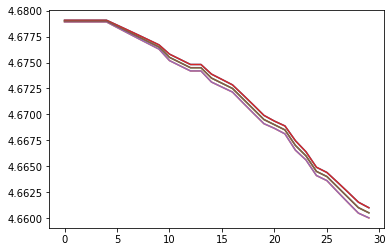

In [2]:
volume_tick_x = np.array(volume_tick.iloc[0:4485]).reshape(-1, 1)
trend_x = np.array(trend.iloc[0:4485]).reshape(-1, 1)
rise_y = np.array(data["price"].iloc[0:4485]).reshape(-1, 1)
X = data[["last_v","amount_tick", "price"]].iloc[0:4485]

def add_price(X, length):
    X["ask_1"] = np.array(ask_volume_list).T[0][0:length]
    X["ask_2"] = np.array(ask_volume_list).T[1][0:length]
    X["ask_3"] = np.array(ask_volume_list).T[2][0:length]
    X["ask_4"] = np.array(ask_volume_list).T[3][0:length]
    X["ask_5"] = np.array(ask_volume_list).T[4][0:length]
    X["bid_1"] = np.array(bid_volume_list).T[0][0:length]
    X["bid_2"] = np.array(bid_volume_list).T[1][0:length]
    X["bid_3"] = np.array(bid_volume_list).T[2][0:length]
    X["bid_4"] = np.array(bid_volume_list).T[3][0:length]
    X["bid_5"] = np.array(bid_volume_list).T[4][0:length]
    X["ask_p1"] = np.array(ask_price_list).T[0][0:length]
    X["ask_p2"] = np.array(ask_price_list).T[1][0:length]
    X["ask_p3"] = np.array(ask_price_list).T[2][0:length]
    X["ask_p4"] = np.array(ask_price_list).T[3][0:length]
    X["ask_p5"] = np.array(ask_price_list).T[4][0:length]
    X["bid_p1"] = np.array(bid_price_list).T[0][0:length]
    X["bid_p2"] = np.array(bid_price_list).T[1][0:length]
    X["bid_p3"] = np.array(bid_price_list).T[2][0:length]
    X["bid_p4"] = np.array(bid_price_list).T[3][0:length]
    X["bid_p5"] = np.array(bid_price_list).T[4][0:length]
    
    ma = [0 for i in range(20)]
    up = [0 for i in range(20)]
    down = [0 for i in range(20)]
    for i in range(20, len(X)):
        temp_std = 0
        ma.append(sum(X['price'].iloc[i-20:i]) / 20)
        for j in range(20):
            temp_std += (X['price'].iloc[i+j-20]-ma[i])**2
        up.append(ma[i]+(temp_std)/20**0.5*2)
        down.append(ma[i]-(temp_std)/20**0.5*2)
    plt.plot(up[20:50])
    plt.plot(down[20:50])
    plt.plot(ma[20:50])
    X["up"] = up[:length]
    X["mid"] = ma[:length]
    X["down"] = down[:length]
    temp_up = 0
    psy = [0 for i in range(20)]
    
    for i in range(20, len(X)):
        temp_up = 0
        for j in range(20):
            if X["price"].iloc[j+i-20]-X["price"].iloc[j+i-19] > 0:
                temp_up += 1
        psy.append(temp_up/20*100)
    X["psy"] = psy[:length]
    return X

data = add_price(data, len(data["price"]))
X = add_price(X, 4485)

###由于bull线的加入，前20个数据为0！！！！

In [3]:
del X["price"]

In [131]:
## 基于sklearn 库的一堆模型试验
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLarsCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#sca = StandardScaler()
#sca.fit(X)
#X = sca.transform(X) ##标准化，试过了标准化不影响结果
#print(X)
#rus = RandomUnderSampler(random_state=0)
#X, rise_y = rus.fit_resample(X, rise_y)

#model = RidgeClassifierCV(class_weight = {1:0.4,0:0.6})

#model = LogisticRegression()
#model = LinearRegression()
#model = LassoLarsCV()
#model = MLPRegressor(activation = 'tanh', alpha = 0.01, max_iter = 5000, verbose = True, hidden_layer_sizes = (256),random_state=1,tol = 1e-7)
#model = DecisionTreeRegressor()
model = RandomForestRegressor(oob_score = True,verbose=3,n_estimators=200)
#model = LinearRegression()
#model = SVR()


model.fit(X, rise_y)
print(model.score(X, rise_y))
temp_predict = model.predict(X)
plt.plot(rise_y[:400])
plt.plot(temp_predict[:400], "g")
#s_mat(temp_predict, rise_y)
#print(model.coef_)
predict_lin = model.predict(X)
print('Baseline RMSE: %.9f' % mean_squared_error(rise_y, predict_lin)**0.5)

ty=[0]
for i in range(len(rise_y)):
    ty.append((rise_y)[i])
ty.pop(-1)
print('Baseline RMSE: %.9f' % mean_squared_error(rise_y, ty)**0.5)

ValueError: Found input variables with inconsistent numbers of samples: [4485, 30]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


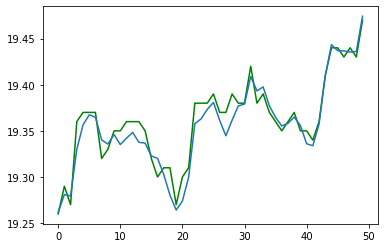

In [108]:
time = 4505
def orgin_price(price_start, lists, stock_price, nums):
    predict_price = [price_start]
    for i in range(1,len(lists)):
        predict_price.append(predict_price[i-1]*(1+lists[i]))
    plt.plot(predict_price[:nums],"g")
    plt.plot(stock_price[:nums])
    plt.legend(["predict","real"])

test_x = data[["last_v","amount_tick","ask_1","ask_2","ask_3","ask_4"
                               ,"ask_5","bid_1","bid_2","bid_3","bid_4","bid_5","ask_p1","ask_p2","ask_p3","ask_p4"
                               ,"ask_p5","bid_p1","bid_p2","bid_p3","bid_p4","bid_p5","up","down","mid","psy"]].iloc[time:]
#sca.fit(test_x)
#test_x = sca.transform(test_x)

temp_test = model.predict(test_x)


temp_price = list(data["change_rate"].iloc[time:])

plt.plot(range(50),data["price"].iloc[time:time+50], "g")
plt.plot(range(50),temp_test[:50])
#plt.plot(to_1[:50])
#plt.plot(to_2[:50])
#print(temp_price[0])
#orgin_price(temp_price[0],temp_test, temp_price,30)
#plt.plot(temp_test)
#plt.plot()

In [4]:
mul_output = []
temp_y = []
for i in range(0,len(rise_y)-30):
    temp_y.append(rise_y[i:i+30])
    mul_output.append(temp_y)

4485
4485
Epoch 1/300
42/42 [==============================] - 15s 37ms/step - loss: 4.6310 - val_loss: 4.5167
Epoch 2/300
42/42 [==============================] - 0s 7ms/step - loss: 4.1479 - val_loss: 3.3614
Epoch 3/300
42/42 [==============================] - 0s 6ms/step - loss: 0.7247 - val_loss: 1.1711
Epoch 4/300
42/42 [==============================] - 0s 7ms/step - loss: 0.5921 - val_loss: 0.7425
Epoch 5/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5204 - val_loss: 0.5433
Epoch 6/300
42/42 [==============================] - 0s 7ms/step - loss: 0.5038 - val_loss: 0.4636
Epoch 7/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4754 - val_loss: 0.3789
Epoch 8/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4598 - val_loss: 0.3501
Epoch 9/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4463 - val_loss: 0.3022
Epoch 10/300
42/42 [==============================] - 0s 6ms/step - loss: 0.4328 - val_loss: 0.27

Epoch 83/300
42/42 [==============================] - 0s 7ms/step - loss: 0.2178 - val_loss: 0.0354
Epoch 84/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2173 - val_loss: 0.1055
Epoch 85/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2158 - val_loss: 0.0377
Epoch 86/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2112 - val_loss: 0.0385
Epoch 87/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2037 - val_loss: 0.0369
Epoch 88/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2098 - val_loss: 0.0331
Epoch 89/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2091 - val_loss: 0.0767
Epoch 90/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2135 - val_loss: 0.0370
Epoch 91/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2040 - val_loss: 0.0597
Epoch 92/300
42/42 [==============================] - 0s 6ms/step - loss: 0.2081 - val_loss: 0.0381


42/42 [==============================] - 0s 7ms/step - loss: 0.0773 - val_loss: 0.0177
Epoch 246/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0786 - val_loss: 0.0072
Epoch 247/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0794 - val_loss: 0.0134
Epoch 248/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0762 - val_loss: 0.0098
Epoch 249/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0764 - val_loss: 0.0065
Epoch 250/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0766 - val_loss: 0.0322
Epoch 251/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0764 - val_loss: 0.0057
Epoch 252/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0759 - val_loss: 0.0060
Epoch 253/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0745 - val_loss: 0.0065
Epoch 254/300
42/42 [==============================] - 0s 7ms/step - loss: 0.0757 - val_loss: 0.0095
Epoc

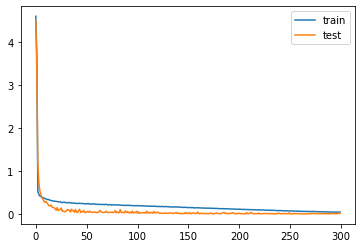

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from keras.layers import Dropout


sca = StandardScaler()
sca.fit(X)
X = sca.transform(X) ##标准化，试过了标准化不影响结果
rise_y = np.array(data["price"].iloc[0:4485]).reshape(-1, 1)
#rise_y = np.array(data["volume_tick"].iloc[0:4485]).reshape(-1, 1)


data_X, data_Y = X , rise_y
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

train_X = np.array(train_X)
test_X = np.array(test_X)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(len(data_X))
print(len(data_Y))

# 设计模型
model = Sequential()

model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(30))
#Adamax = optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
#Adam = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mae', optimizer='Adam')
# 拟合模型
history = model.fit(train_X, train_Y, epochs=150, batch_size=75, validation_data=(test_X, test_Y), 
                    verbose=1, shuffle=False)
# 绘制损失趋势线
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Text(0.5, 1.0, '申万宏源')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30003 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30003 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 19975 missing from cur

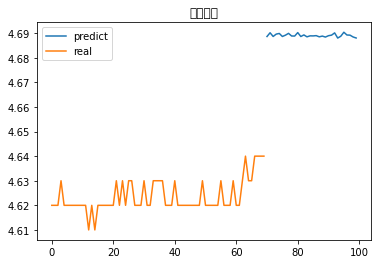

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
%matplotlib inline
predict_list = model.predict(test_X)
predict_list = predict_list[:,0]
plt.plot(range(70,100),predict_list[-1])
plt.plot(range(70),test_Y[-70:])
plt.legend(["predict","real"])
plt.title("申万宏源")
#print('Baseline RMSE: %.9f' % mean_squared_error(test_Y, predict_list)**0.5)